#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip freeze > requirements.txt

In [4]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [5]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [6]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [7]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [8]:
car_donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operation            1196 non-null   object 
 1   id                   1196 non-null   float64
 2   status               1196 non-null   float64
 3   Sold_Year            1098 non-null   float64
 4   Sold_month           1098 non-null   float64
 5   Sold_Yearmonth       1098 non-null   object 
 6   Donation_date        1191 non-null   object 
 7   time                 1093 non-null   object 
 8   name                 1170 non-null   object 
 9   car_year             1188 non-null   float64
 10  make                 1187 non-null   object 
 11  model                1173 non-null   object 
 12  mileage              1104 non-null   object 
 13  plate                1152 non-null   object 
 14  vin                  1169 non-null   object 
 15  phone                1184 non-null   o

In [9]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# checking the correlation between the target variable and the float  and int variable

<ipython-input-10-195bfa47f4ba>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


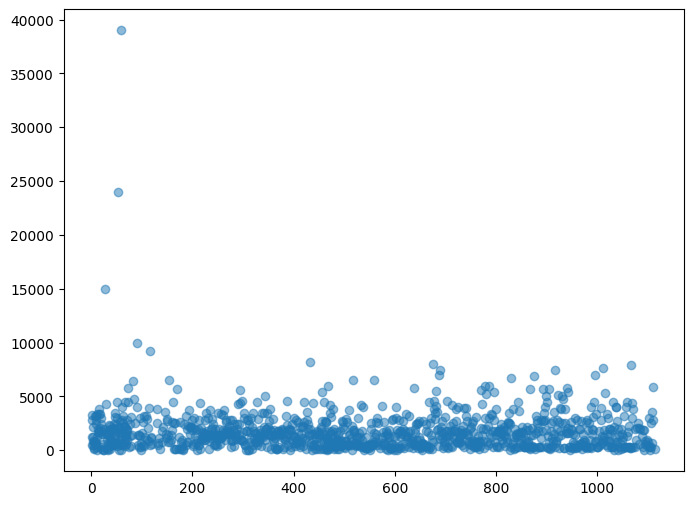

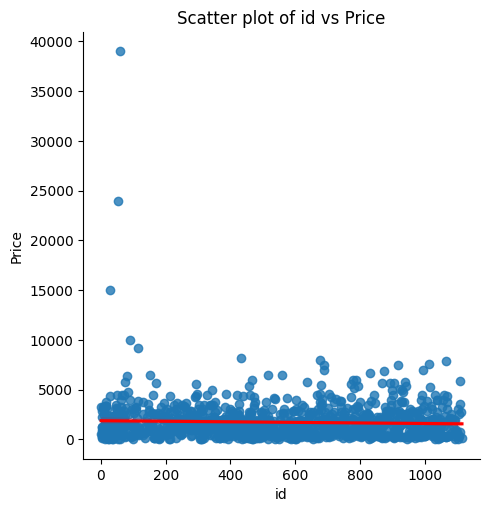

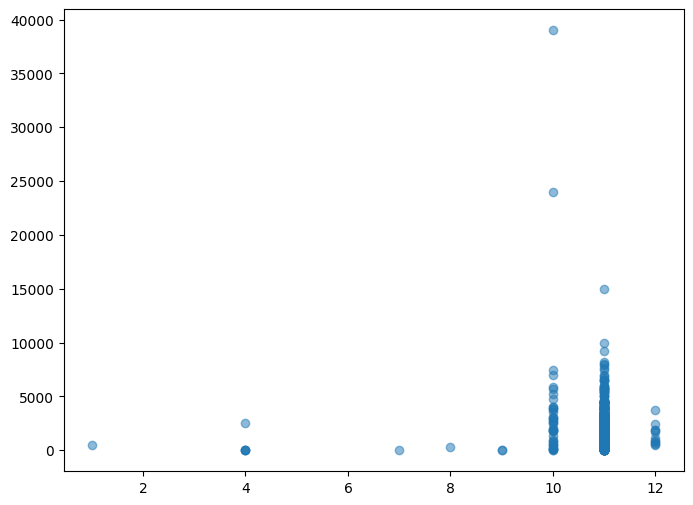

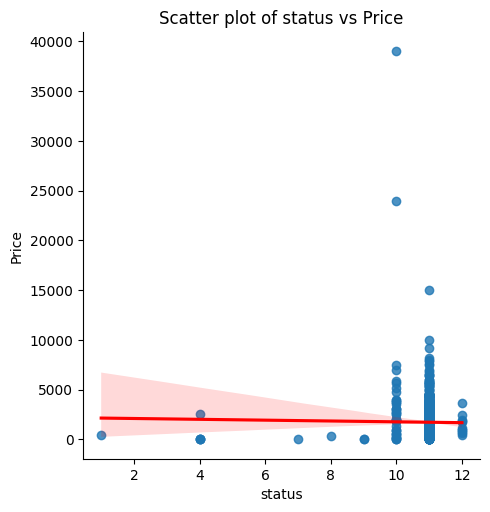

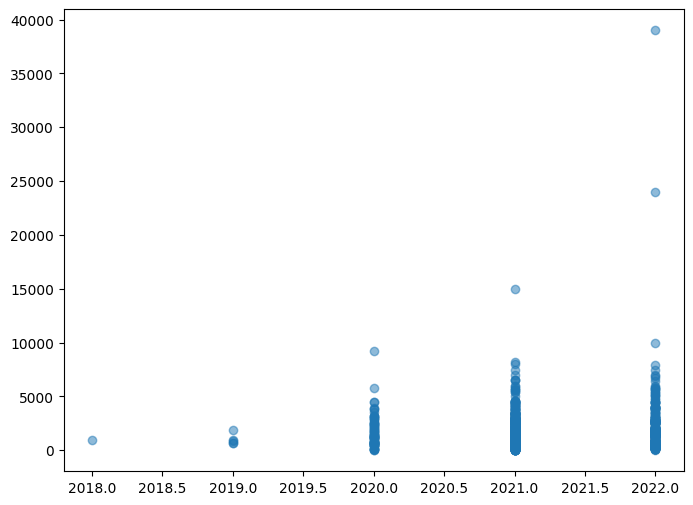

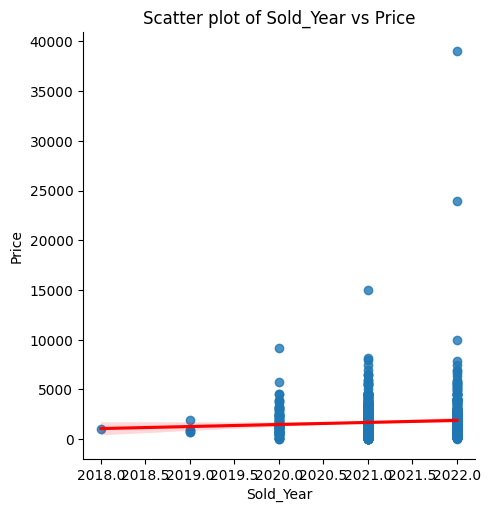

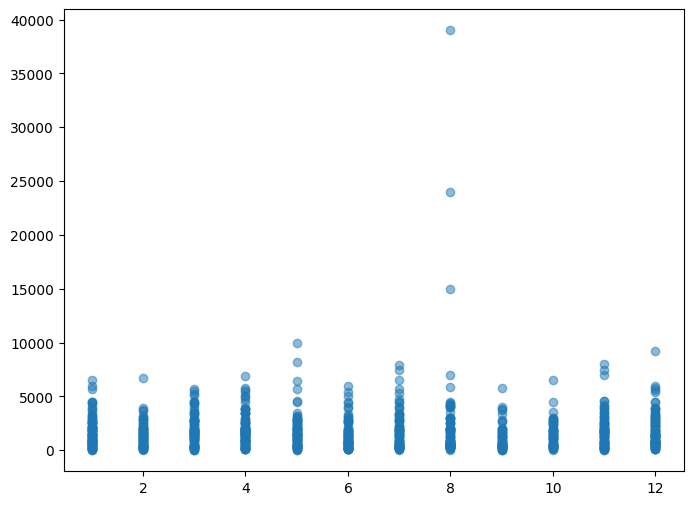

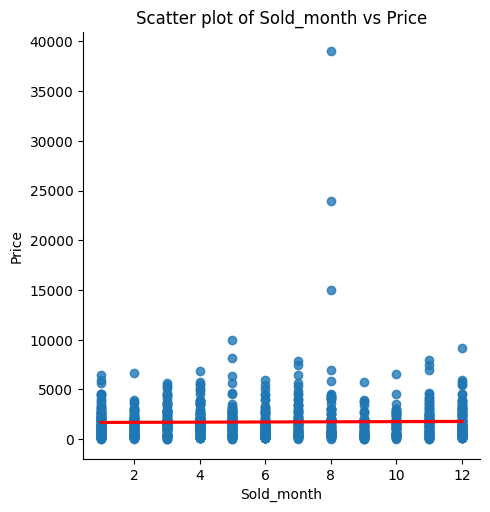

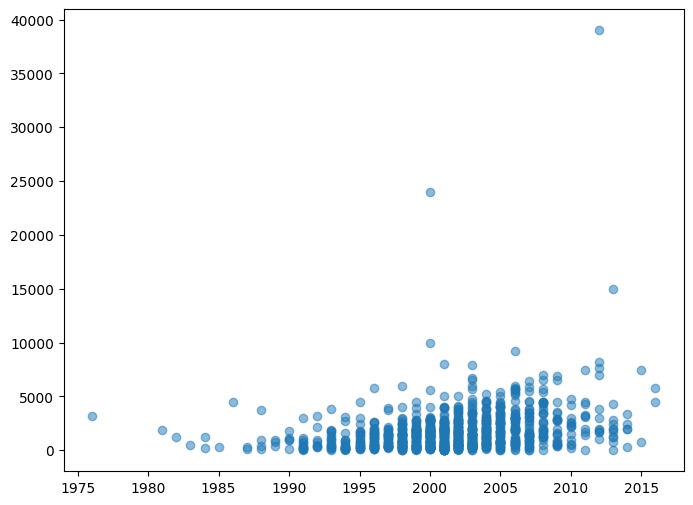

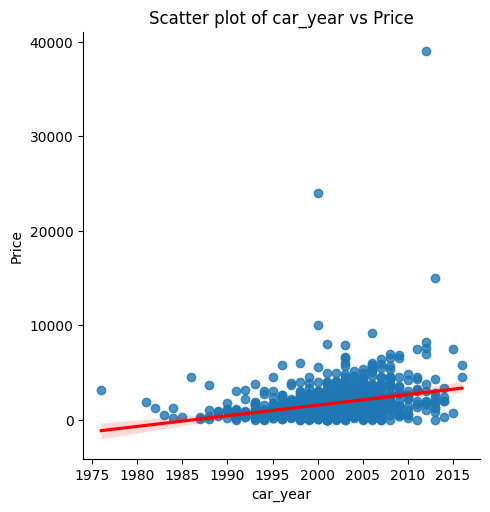

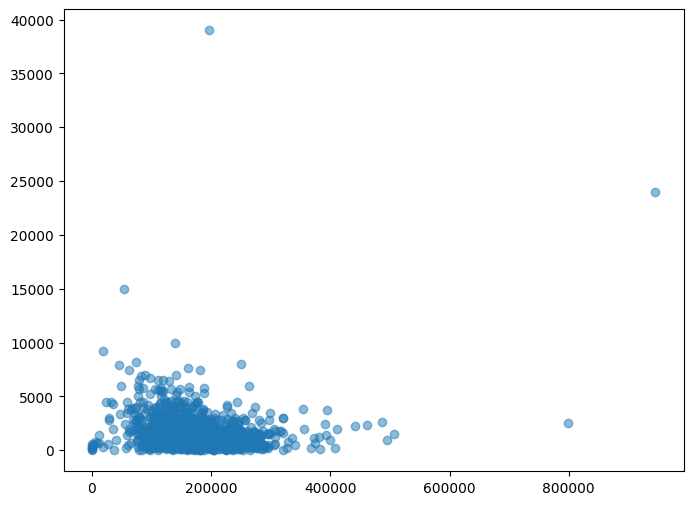

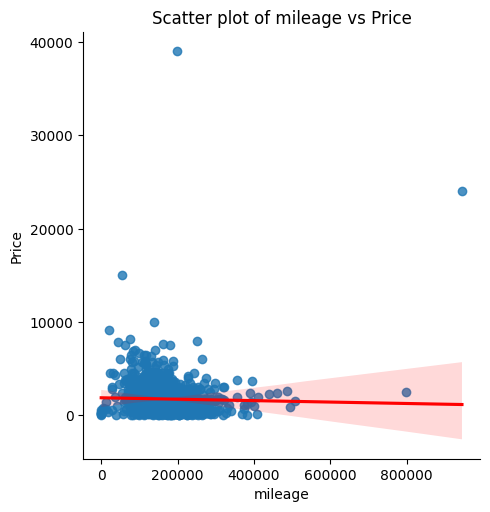

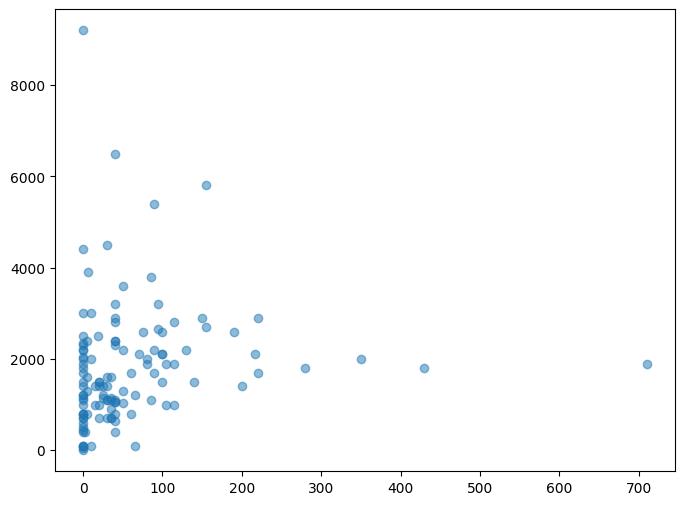

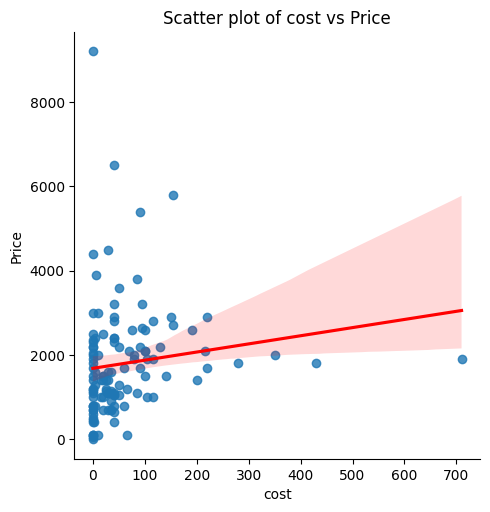

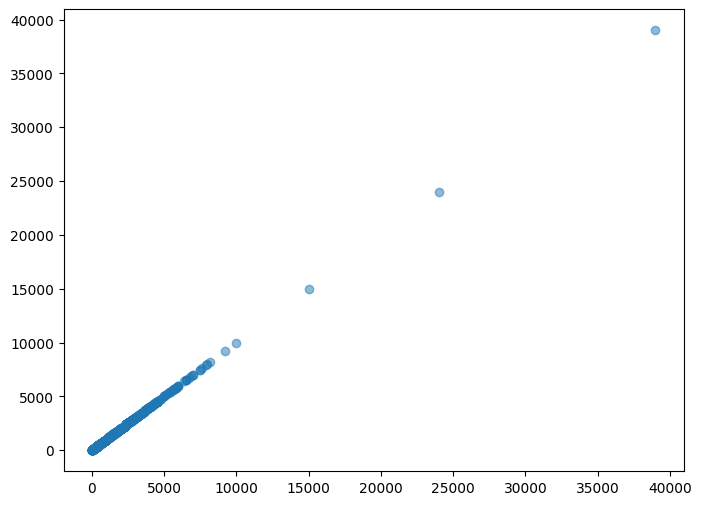

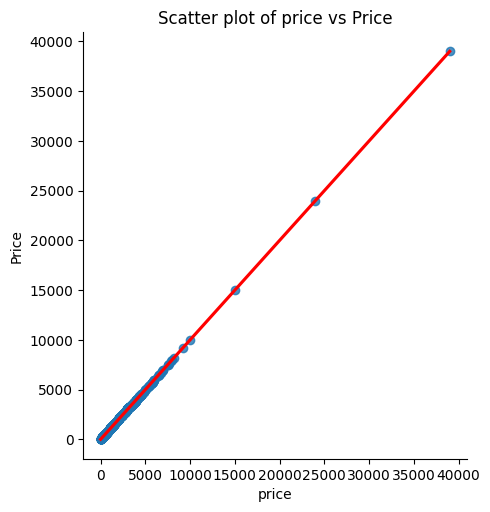

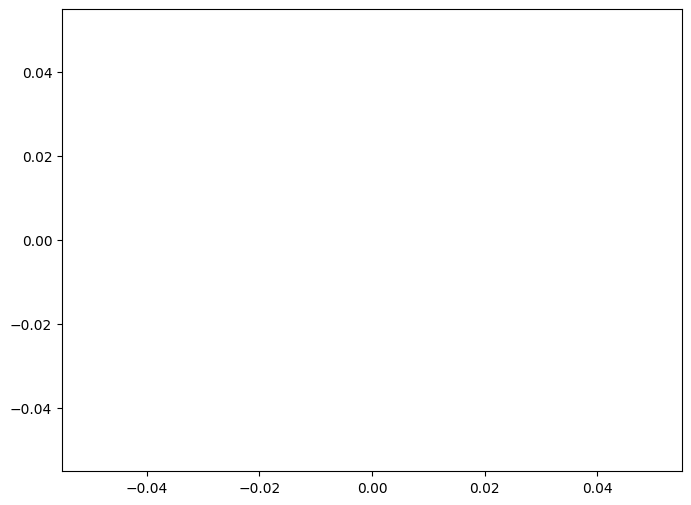

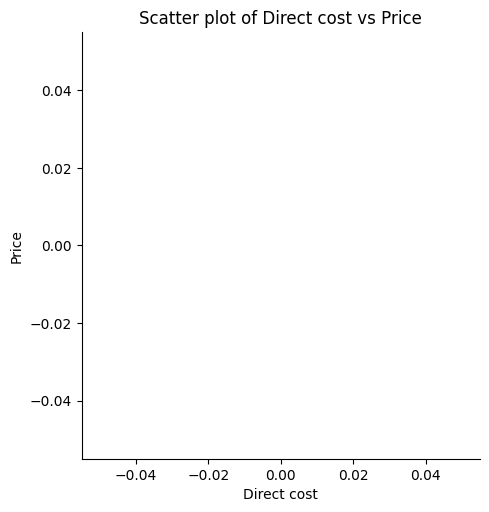

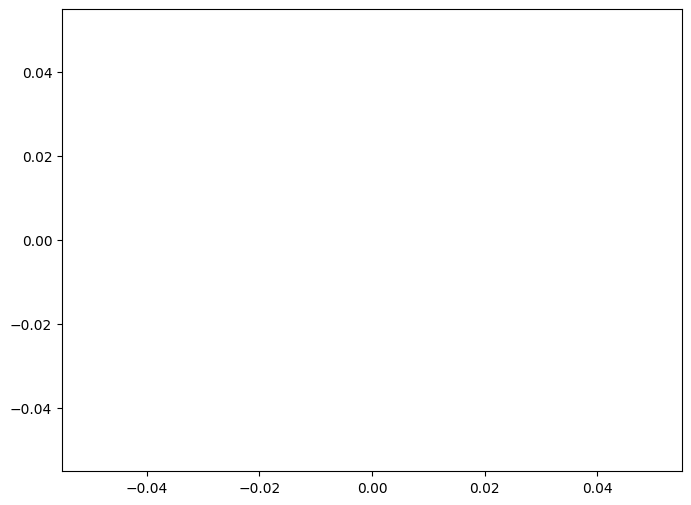

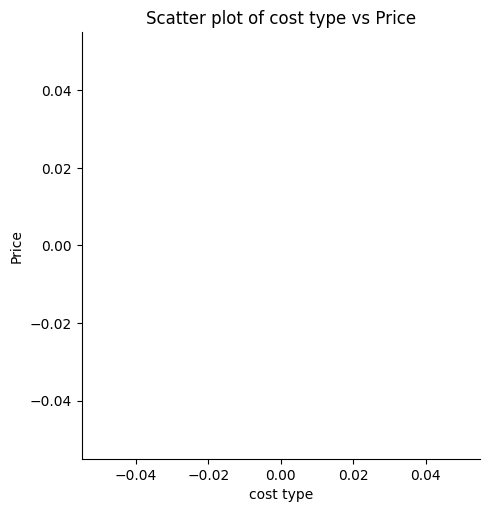

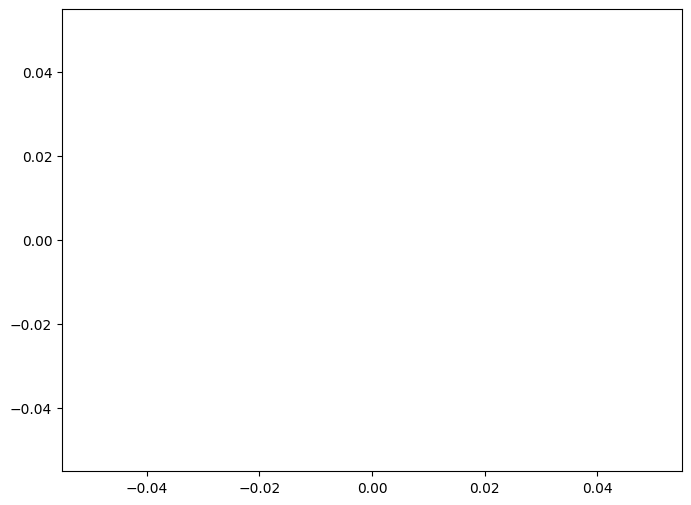

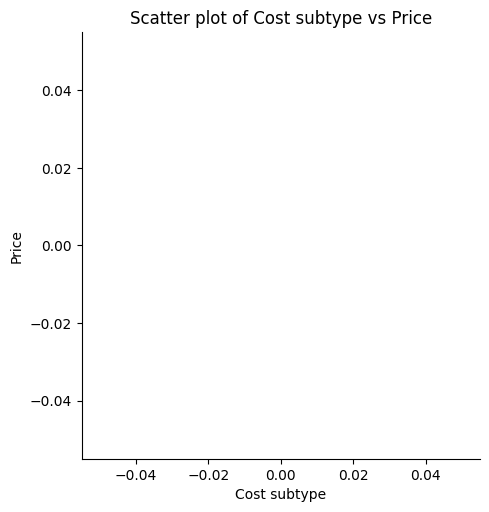

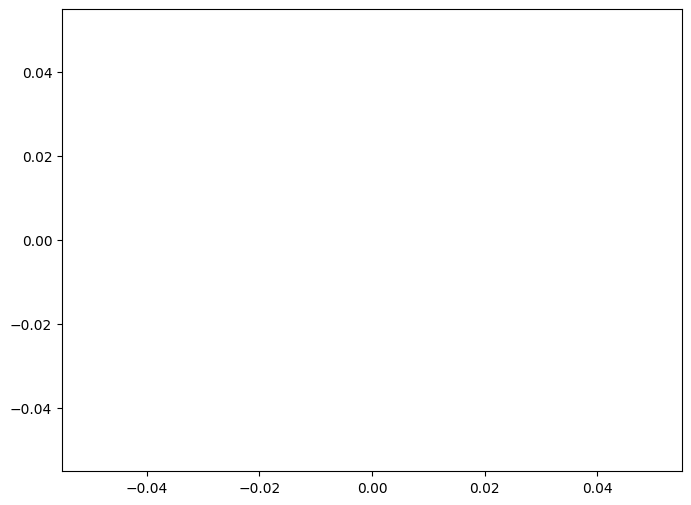

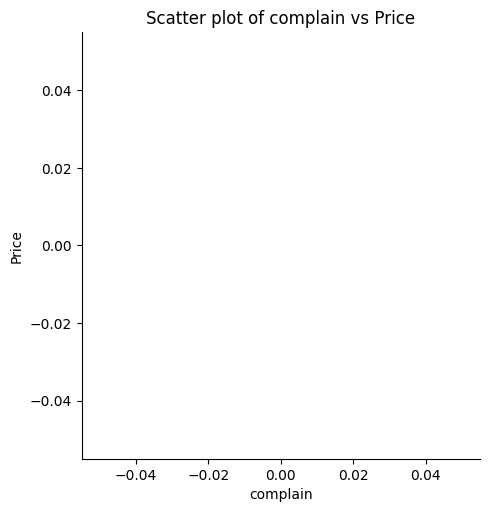

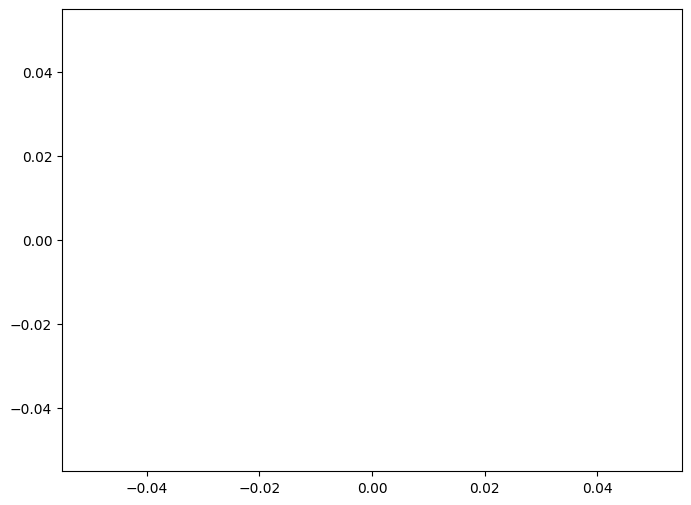

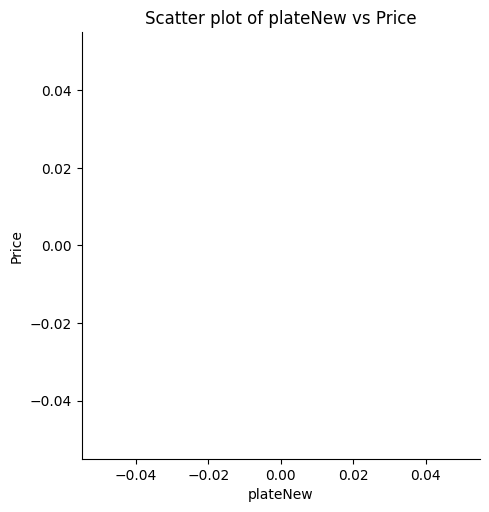

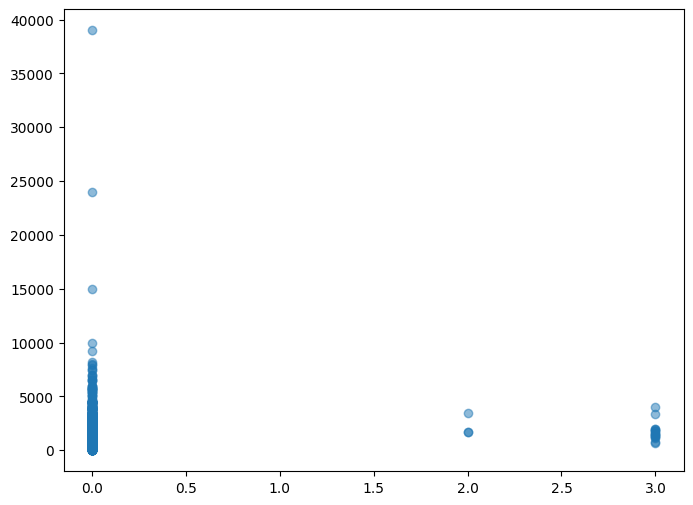

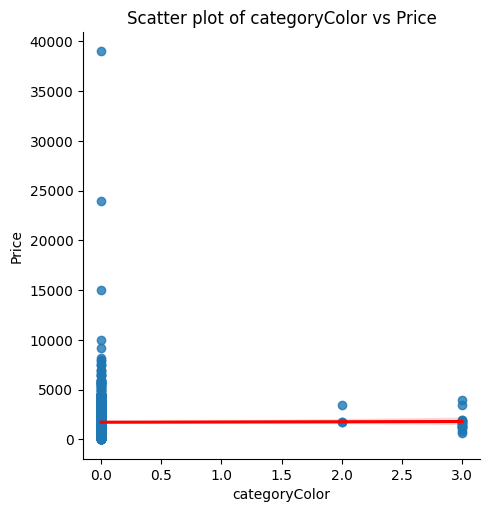

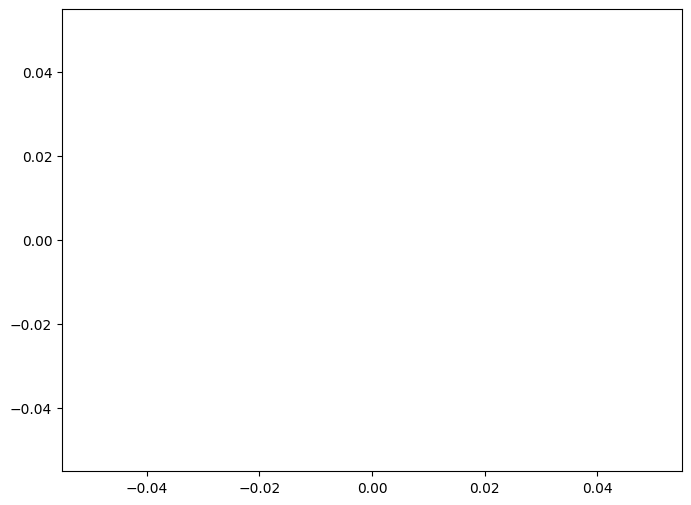

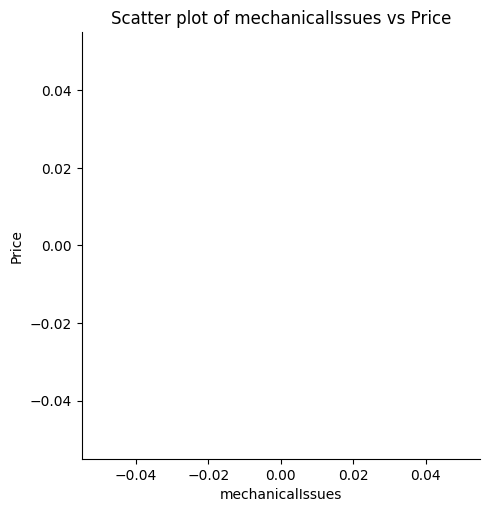

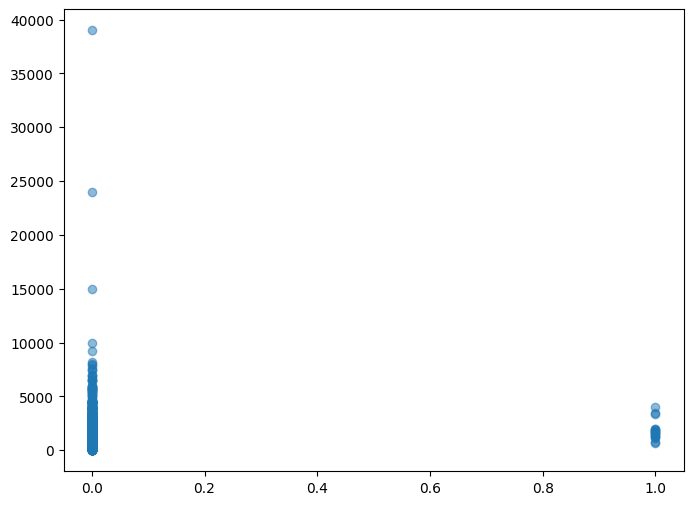

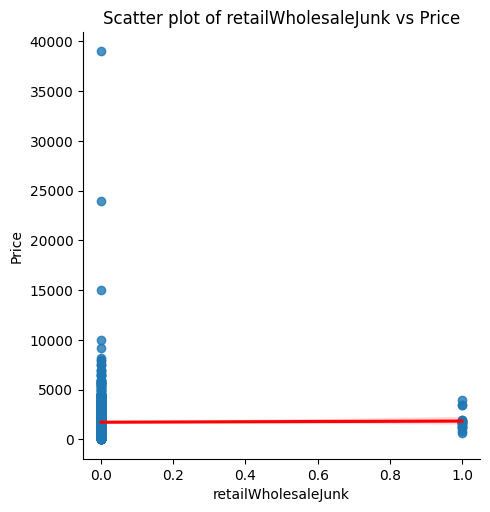

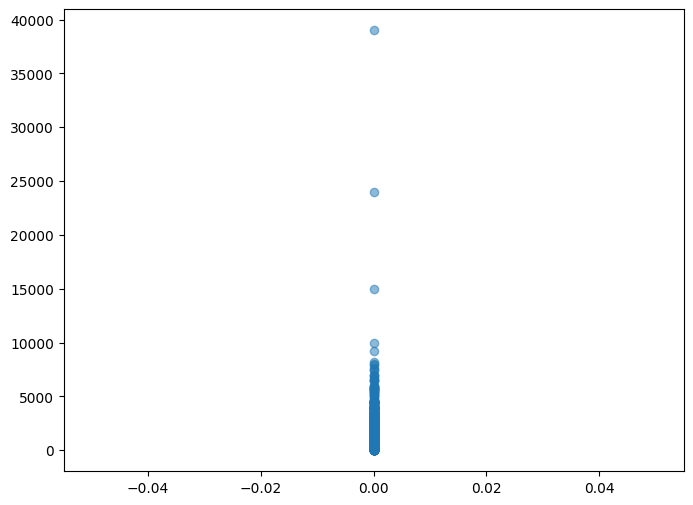

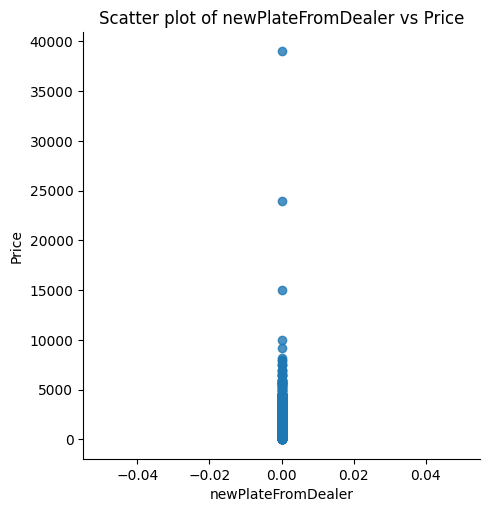

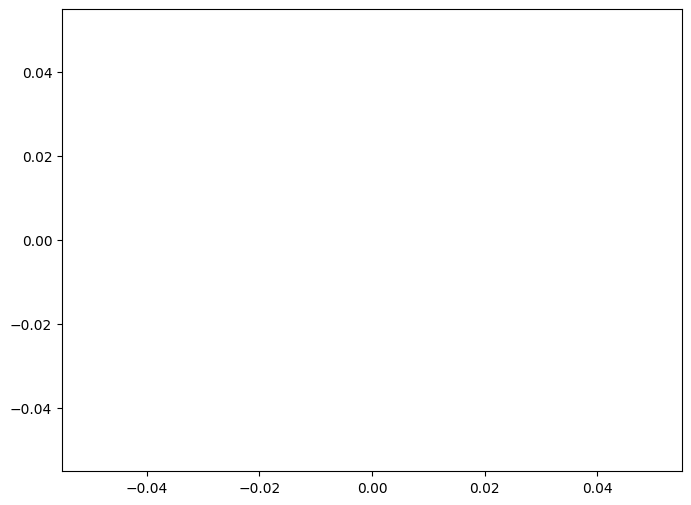

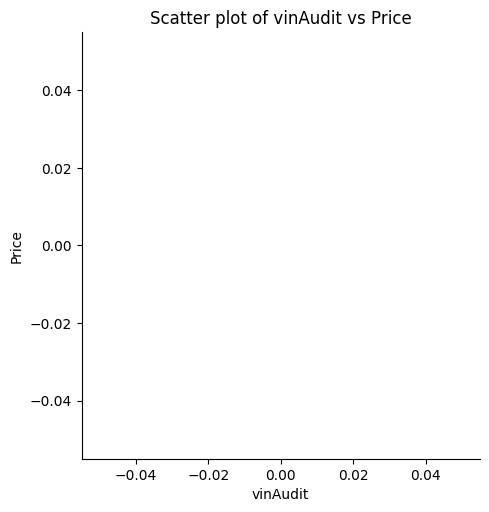

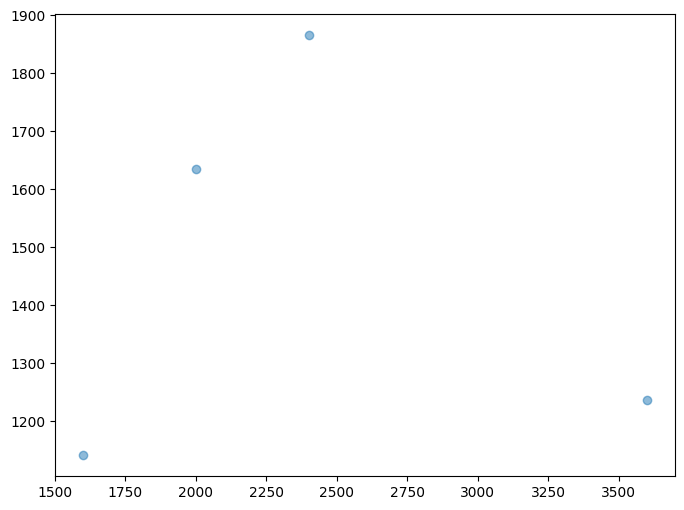

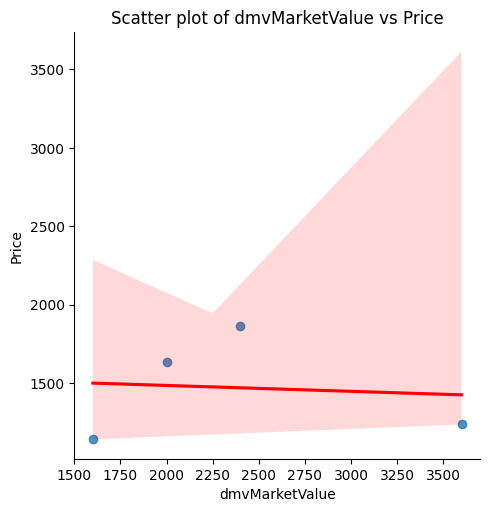

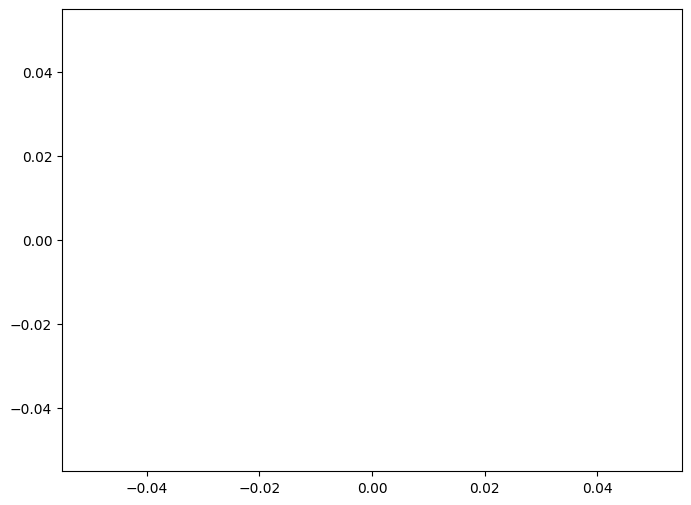

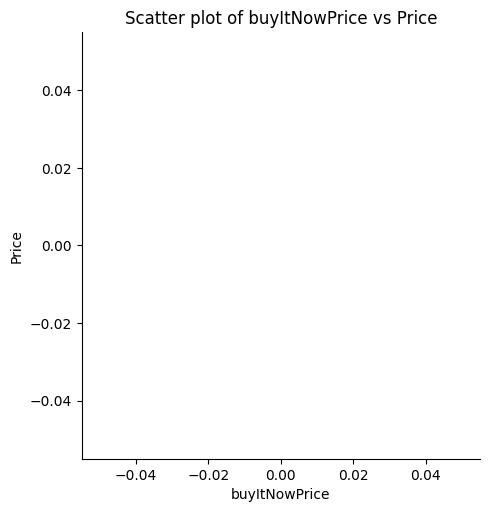

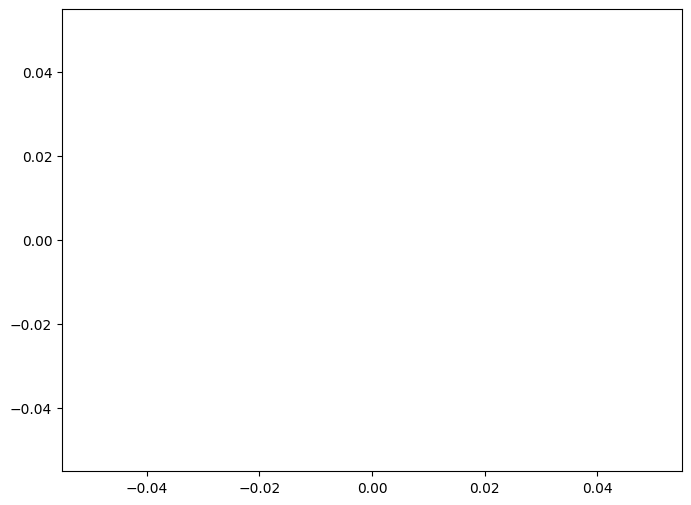

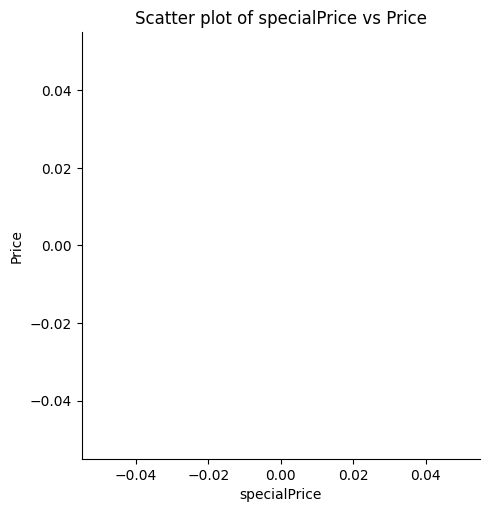

In [10]:
# First we are Selecting the numerical columns for correlationwith target variable
numerical_columns = car_donation.select_dtypes(include=['int64', 'float64'])

# We are check the list of variables
variables_to_check = numerical_columns

# We are Creating the scatter plot using a loop
for variable in variables_to_check:
  plt.figure(figsize=(8, 6))
  plt.scatter(car_donation[variable], car_donation['price'], alpha=0.5)
  sns.lmplot(x=variable, y='price', data=car_donation, line_kws={'color': 'red'})
  plt.title(f'Scatter plot of {variable} vs Price')
  plt.xlabel(variable)
  plt.ylabel('Price')

  # Adding a trend line

# # We are Cmputing the correlation between the target variable and other numerical variable
# correlation_with_price =numerical_columns.corr()['price'].sort_values(ascending=False)

# # We are Plotting the correlation map using Seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap='coolwarm', linewidth=0.5)
# plt.title('Correlation Matrix with Price')
# plt.show()


In [11]:
def get_dataset():
    df=pd.read_csv("/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv")
    print(df.head())
    return df

In [14]:
def clean_dataset(dataset):
    # step1: we need to check the duplicate inside the dataset

    # after checking we need to remove the duplicated record
    dataset=dataset.drop_duplicates()

    # step 4: we need to remove the constant columns in the dataset
    dataset=dataset.dropna(axis=1,how='all')
    # step 5: data transformation of the feature
    dataset['price']=dataset['price'].str.replace(',','')
    dataset.price=dataset.price.astype(float)
    dataset['mileage']=dataset['mileage'].str.replace(',','')
    dataset['mileage'] = pd.to_numeric(dataset['mileage'],errors='coerce')
    #dataset['mileage'] = pd.to_numeric(dataset['mileage'],errors='coerce')
    #dataset['mileage'] = pd.to_numeric(dataset['mileage'],errors='coerce')
    dataset.mileage=dataset.mileage.astype(float)
    csv_file=dataset.to_csv(os.path.join('/content/drive/MyDrive/datas/','clean_data.csv'))
    #print(dataset.duplicated())
    #return dataset.duplicated()
    print(dataset)
    return dataset

In [15]:
def calculate_vif(X,feature_idx):
    mask=np.arange(X.shape[1]!=feature_idx)
    X_partial=X[:,mask]
    # we wish to Add a column of ones to X_partial for the intercept term
    X_partial=np.concatenate((np.ones((X_partial.shape[0],1)),X_partial),axis=1)
    # caculating the OLS coefficients
    coef=np.linalg.lstsq(X_partial,X[:,feature_idx],rcond=None)[0]
    # we are Calculate the predicted values
    y_hat=np.dot(X_partial,coef)
    # Calculated the residual sum of square (RSS)
    rss=np.sum((X[:,feature_idx]-y_hat)**2)
    # Calculated the total sum of squares (TSS)
    tss=np.sum((X[:,feature_idx]-np.mean(X[:,feature_idx]))**2)
    # calcuating the r_squared
    r_squared=1-(rss/tss)
    #caculating the vif
    vif=1/(1-r_squared)
    # we are returning vif
    return vif

In [16]:
# next, we are definting a function to Calcualte the VIF for all features
def calculate_all_vif(X):
    # defining the number of feature
    num_features=X.shape[1]
    # creating a list to store all vifs for different variables
    vifs=[]
    # looping over each feature
    for i in range(num_features):
        vif=calculate_vif(X,i)
        # we wish to append vif back to the list
        vifs.append(vif)
    return vifs

In [17]:
# need to create a feature selection function after data cleaning to extract the important feature
def feature_selection(dataset,target_column,method='forward'):
    # Step 1: Remove duplicate records
    dataset=dataset.drop_duplicates()
    #Step 2: Remove the constant columns
    #dataset=dataset.dropna(axis=1,how='all')
    dataset=dataset.fillna(0)
    # Step 3: Perform data transformation,if needed

    # Step 4: Select numeric variables
    numeric_cols=dataset.select_dtypes(include=np.number).columns.tolist()
    X=dataset[numeric_cols].values

    # Step 5: Calculate VIF for each feature
    vifs=calculate_all_vif(X)
    # Step 6: Select features with VIF less than a threshold (e.g., 5)
    selected_features=[numeric_cols[i] for i,vif in enumerate(vifs) if vif<5]
    # selected_features=[]
    # remaining_features=numeric_cols.copy()
    # current_score=0
    # best_new_score=0

    # taking care of the remaining feature, use them for model prediction
    # while remaining_features:
    #     scores=[]
    #     #creating for loop to loop over the feature
    #     for feature in remaining_features:
    #         selected_features.append(feature)
    #         # setting up the predictor(independent variable)
    #         X=dataset[selected_features]
    #         # setting up the response(dependent varibale)
    #         y=dataset[target_column]

    #         # We need to fit the machine learning model and calculated the score (R-squared,accuracy)
    #         # using linear regression
    #         score=linear_regression(X,y)
    #         scores.append(score)
    #         # we need to remove the not use feature
    #         selected_features.remove(feature)
    #         # we are finding what are our best new feature
    #     best_new_feature=remaining_features[np.argmax(scores)]
    #         # getting the best new score
    #     best_new_score=np.max(scores)

    # # we are trying to use either forward or backward selection
    #     if method=='forward':
    #         if best_new_score>current_score:
    #             selected_features.append(best_new_feature)
    #             remaining_features.remove(best_new_feature)
    #             # assighing the best new score to be the current score
    #             current_score=best_new_score
    #         else:
    #             break
    # # then we try the backward methods
    #     elif method=='backward':
    #         if best_new_score>=current_score:
    #             selected_features.append(best_new_feature)
    #             remaining_features.remove(best_new_feature)
    #             current_score=best_new_score
    #         else:
    #             break
    return selected_features

  operation   id  status  Sold_Year  Sold_month Sold_Yearmonth Donation_date  \
0        SF  1.0    11.0     2021.0         1.0        2021-01    2020/08/07   
1        SF  2.0    11.0     2020.0        11.0        2020-11    2020/10/31   
2        SF  3.0    11.0     2020.0        11.0        2020-11    2020/10/31   
3        SF  4.0    11.0     2020.0        11.0        2020-11    2020/11/01   
4        SF  5.0    11.0     2020.0        11.0        2020-11    2020/11/01   

       time            name  car_year  ... mechanicalIssues  \
0       NaN  Chung Pei Chen    2011.0  ...              NaN   
1   4:00 PM    CHENH CARSON    2003.0  ...              NaN   
2   3:00 PM     Fuchun Wang    2001.0  ...              NaN   
3  11:30 PM        CHEN LEI    2006.0  ...              NaN   
4   4:00 PM     MINGLANG HU    1999.0  ...              NaN   

  retailWholesaleJunk newPlateFromDealer vinAudit  kbb dmvMarketValue useTax  \
0                 0.0                0.0      NaN  NaN      

<ipython-input-18-4fcb68400018>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('RdBu',30)


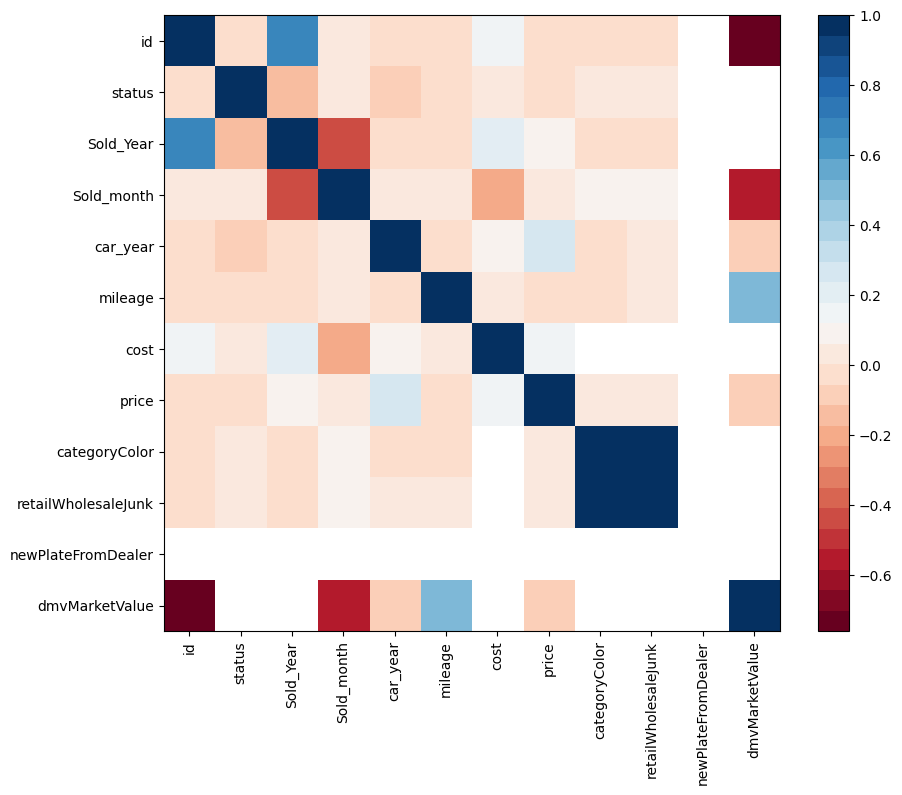

In [18]:
import pandas as pd

df=get_dataset()
clean_df=clean_dataset(df)
# we wish to only check the numeric columns correlation, we wish to drop the catgorical columns
clean_df_numeric=clean_df.select_dtypes(include=np.number)
#before we do the feature seection, we need to chck for mutlicolinearlity
# first we need to get the correlation matrix
corr_matrix=clean_df_numeric.corr()
# next, we wish to vosualized the correlation matrix
plt.figure(figsize=(10,8))
cmap=cm.get_cmap('RdBu',30)
# then we wish to use imshow
plt.imshow(corr_matrix,interpolation='nearest',cmap=cmap)
# take care of the colorbar
plt.colorbar()
#setting up the tickmark
tick_marks=np.arange(len(corr_matrix.columns))
#setting up the xticks
plt.xticks(tick_marks,corr_matrix.columns,rotation=90)
# setting up the yticks
plt.yticks(tick_marks,corr_matrix.columns)
# we wish to show the graph
plt.show()
# getting the selected features
#selected_features=feature_selection(df,'price',method='forward')
#selected_features=feature_selection(clean_df,target_column='price')
# print out the selected features
#print(selected_features)


In [19]:
print(clean_df.isna().sum())

operation                1
id                       1
status                   1
Sold_Year               99
Sold_month              99
                      ... 
newPlateFromDealer       1
kbb                   1179
dmvMarketValue        1193
useTax                1192
data_refresh_time        1
Length: 63, dtype: int64


# We wish to Examine the target variable before  and after filling the na values

In [20]:
# we wish to check our target varibale after fill with the median value
print(clean_df['price'].describe())

count     1112.000000
mean      1720.520683
std       1977.371657
min          0.000000
25%        540.000000
50%       1392.500000
75%       2300.000000
max      39000.000000
Name: price, dtype: float64


In [21]:
print(clean_df_numeric['price'].describe())

count     1112.000000
mean      1720.520683
std       1977.371657
min          0.000000
25%        540.000000
50%       1392.500000
75%       2300.000000
max      39000.000000
Name: price, dtype: float64


In [22]:
clean_df_numeric['status']=clean_df_numeric['status'].fillna(clean_df_numeric['status'].median())
clean_df_numeric['Sold_Year']=clean_df_numeric['Sold_Year'].fillna(clean_df_numeric['Sold_Year'].median())
clean_df_numeric['Sold_month']=clean_df_numeric['Sold_month'].fillna(clean_df_numeric['Sold_month'].median())
clean_df_numeric['car_year']=clean_df_numeric['car_year'].fillna(clean_df_numeric['car_year'].median())
clean_df_numeric['mileage']=clean_df_numeric['mileage'].fillna(clean_df_numeric['mileage'].median())
clean_df_numeric['cost']=clean_df_numeric['cost'].fillna(clean_df_numeric['cost'].median())
clean_df_numeric['categoryColor']=clean_df_numeric['categoryColor'].fillna(clean_df_numeric['categoryColor'].median())
clean_df_numeric['dmvMarketValue']=clean_df_numeric['dmvMarketValue'].fillna(clean_df_numeric['dmvMarketValue'].median())


In [23]:
#Subset numeric features:numeric_cols
numeric_cols=clean_df.select_dtypes(include=[np.number])

In [24]:
# Subset categorical feature:categoric_cols
categoric_cols=clean_df.select_dtypes(include=[np.object])

<ipython-input-24-36a3a9057737>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoric_cols=clean_df.select_dtypes(include=[np.object])


In [25]:
imp_median=SimpleImputer(strategy='median')
clean_df_numeric_imp_median=imp_median.fit_transform(numeric_cols)


In [26]:
clean_df_numeric_medianDF=pd.DataFrame(clean_df_numeric_imp_median,columns=numeric_cols.columns)

In [27]:
# Print out the dataframe to check
clean_df_numeric_medianDF

,id,status,Sold_Year,Sold_month,car_year,mileage,cost,price,categoryColor,retailWholesaleJunk,newPlateFromDealer,dmvMarketValue
0,1.0,11.0,2021.0,1.0,2011.0,131297.0,35.0,3300.0,0.0,0.0,0.0,2200.0
1,2.0,11.0,2020.0,11.0,2003.0,100257.0,65.0,1200.0,0.0,0.0,0.0,2200.0
2,3.0,11.0,2020.0,11.0,2001.0,126089.0,130.0,2200.0,0.0,0.0,0.0,2200.0
3,4.0,11.0,2020.0,11.0,2006.0,224304.0,35.0,900.0,0.0,0.0,0.0,2200.0
4,5.0,11.0,2020.0,11.0,1999.0,236924.0,0.0,100.0,0.0,0.0,0.0,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,498.0,1.0,2021.0,6.0,2011.0,163075.0,35.0,1392.5,0.0,0.0,0.0,2200.0
1193,499.0,1.0,2021.0,6.0,2008.0,165981.0,35.0,1392.5,0.0,0.0,0.0,2200.0
1194,500.0,1.0,2021.0,6.0,2009.0,165981.0,35.0,1392.5,0.0,0.0,0.0,2200.0
1195,501.0,1.0,2021.0,6.0,2002.0,165981.0,35.0,1392.5,0.0,0.0,0.0,2200.0


In [28]:
# Creating the train and test size
clean_df_subset=clean_df_numeric_medianDF[['status', 'Sold_Year', 'Sold_month', 'car_year', 'mileage', 'cost', 'categoryColor', 'dmvMarketValue','price']]
trainingSet,testSet=train_test_split(clean_df_subset)

In [31]:
# checking the mean,median,and max before dropping the outliers
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# next, we are creating index of rows to keep
idx=(np.abs(stats.zscore(numeric_cols))<3).all(axis=1)

# Next, we wish to Concatenate numeric and categorical subsets
clean_df_out_drop=pd.concat([numeric_cols.loc[idx],categoric_cols.loc[idx]],axis=1)

# we want to check the mean,median,and max after dropping
print(clean_df_out_drop.mean())
print(clean_df_out_drop.median())
print(clean_df_out_drop.max())

id                        541.401338
status                     10.366221
Sold_Year                2021.234062
Sold_month                  6.310565
car_year                 2001.547138
mileage                173853.497273
cost                       58.495868
price                    1720.520683
categoryColor               0.047659
retailWholesaleJunk         0.015886
newPlateFromDealer          0.000000
dmvMarketValue           2400.000000
dtype: float64
id                        521.5
status                     11.0
Sold_Year                2021.0
Sold_month                  6.0
car_year                 2002.0
mileage                165981.0
cost                       35.0
price                    1392.5
categoryColor               0.0
retailWholesaleJunk         0.0
newPlateFromDealer          0.0
dmvMarketValue           2200.0
dtype: float64
id                       1123.0
status                     12.0
Sold_Year                2022.0
Sold_month                 12.0
car_year      

In [30]:
X = clean_df_numeric[['status', 'Sold_Year', 'Sold_month', 'car_year', 'mileage', 'cost', 'categoryColor', 'dmvMarketValue']]
Y = clean_df_numeric['price'].fillna(0).values

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model 1: Linear Regression

In [33]:
!pip install numpy scikit-learn statsmodels

In [34]:
!pip install statsmodels

# Importing the require package

In [35]:
#Import the require library
import pandas as pd
import statsmodels.api as sm

# Step 2: Provided data

In [36]:
# declare target and predictor variables
X = clean_df_numeric[['status', 'Sold_Year', 'Sold_month', 'car_year', 'mileage', 'cost', 'categoryColor', 'dmvMarketValue']]
y = clean_df_numeric['price'].fillna(0).values

In [37]:
#coming up an function to do forward selection
def forward_selection(X, y, significance_level=0.05):
  # need an array to store the selected features
  selected_features = []
  # also need an variable to store the remianing feature
  remaining_features = list(X.columns)
  # we wish to check the length of the remianing features
  while len(remaining_features) > 0:
     best_pval = 1
     best_feature = None
     for feature in remaining_features:
      # by using for loop, each time we are increasing one feature to our equations to estimate price predictions
        model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
        pval = model.pvalues[feature]
        # when the pvalue is less than our best pval we will assign it to be the new best pvalues
        if pval < best_pval:
            best_pval = pval
            best_feature = feature
        # when the best pvales is less than the significance values, we will append the feature to the best features
     if best_pval< significance_level:
          selected_features.append(best_feature)
          remaining_features.remove(best_feature)
     else:
            # otherwise, we are breaking out of the loops
          break
  return selected_features

selected_features_forward = forward_selection(X, y)


In [38]:
# we also wish to create an function to the backward selection
def backward_elimination(X, y, significance_level=0.05):
  # also need to have an variable to store the remianing features
  remaining_features = list(X.columns)
  while len(remaining_features) > 0:
    # we are fitting simple linear regression model
    model = sm.OLS(y, sm.add_constant(X[remaining_features])).fit()
    pvals = model.pvalues.iloc[1:]
    # we are setting the maximum pvalues to an variable max_pval
    max_pval = pvals.max()
    if max_pval >= significance_level:
      # going through the loop, we are removing the pvalues with the maximum values
      remove_feature = pvals.idxmax()
      remaining_features.remove(remove_feature)
    else:
      # we are breaking out of the loop
      break
  return remaining_features

selected_features_backward = backward_elimination(X, y)

# Then we wish to compare the result of the forward and backward selections

In [39]:
# Using forward selection
X_forward = X[selected_features_forward]
model_forward = sm.OLS(y, sm.add_constant(X_forward)).fit()
# we are checking the model's summary
print(model_forward.summary())

#Using backward elimination
X_backward = X[selected_features_backward]
model_backward = sm.OLS(y, sm.add_constant(X_backward)).fit()
print(model_backward.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     52.07
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.25e-31
Time:                        18:48:52   Log-Likelihood:                -10696.
No. Observations:                1197   AIC:                         2.140e+04
Df Residuals:                    1193   BIC:                         2.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.243e+05   1.87e+05     -3.878      0.0

# Handling categorical variables

In [40]:
# Import the require lbirary
import pandas as pd
import statsmodels.api as sm

# Prepare the predictor and target variables
X = car_donation[['Sold_Year','mileage']]
y = car_donation['price']

# We are Handling Missing values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# We are Performing Log Transformation on price to handle ero values
y = np.log1p(y)

# Then, we are conducting Feature Engineering
X['Age'] = pd.Timestamp.now().year - X['Sold_Year']

# Then We are doing an Feature selection
selected_features=['Age', 'mileage']

# We are Performing Regression with selected features
X_selected = X[selected_features]
# Adding constant for intercept
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()
print("Model Summary")
print(model.summary())

Model Summary
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8414.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:49:20   Log-Likelihood:                -2434.8
No. Observations:                1672   AIC:                             4876.
Df Residuals:                    1669   BIC:                             4892.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8944      0.067    10

<ipython-input-40-d2bc402dd2a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
<ipython-input-40-d2bc402dd2a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = pd.Timestamp.now().year - X['Sold_Year']
